# Part 1

In [111]:
import json

with open('logins.json') as json_file:  
    data = json.load(json_file)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.DataFrame(data)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [115]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [116]:
df['login_time'] = pd.to_datetime(df['login_time'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [118]:
cool = df.set_index(df.login_time).resample('15T').count()
#df.head()

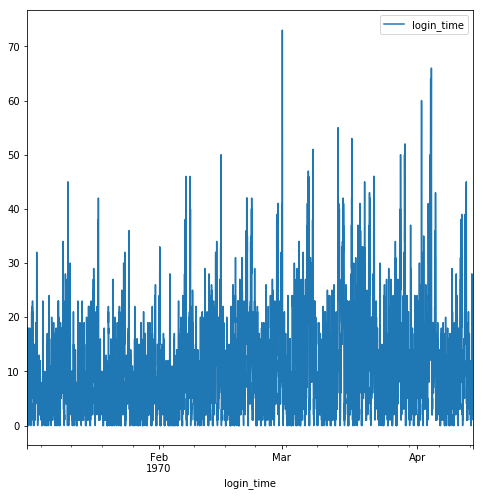

In [119]:
# The visuals show that were is a spike around the beginning of every month. The bar chart below shows that data
# is missing. The gap seems cyclical. 
cool.plot(figsize=(8,8))

In [120]:
#cool.plot(kind='bar',figsize=(8,8))

# Part 2.
1. I would choose the metric that keeps track of the amount of times that a toll is reimbursed in comparison tot he amount that would have been reimbursed if reimbursments were given prior. The reason for this metric is because each reimbursment would show the amount of times that drivers go from one city to the other, which is the intented modification in behavior. 

2. I would test the statistical significance in the difference between the rhythms before and after the reimbursments were given. a. I would gather the data that tracks the rhythms between the cities, and divide the data between those which were collected before and after the reimbursments. b. I would get the differences in rhythms, after determining how to aggregate the rhythms, and test that difference under the null hypothesis that they are the same. c. If there is a difference, then driver behavior may be changing, if not, then there may be a reason other than the tolls for the circadian rhythms. 

# Part 3

In [121]:
with open('ultimate_data_challenge.json') as json_file2:  
    data2 = json.load(json_file2)

In [122]:
df1 = pd.DataFrame(data2)

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [124]:
df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])
df1['signup_date'] = pd.to_datetime(df1['signup_date'])

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [126]:
# 1
len(df1[(df1.last_trip_date.max() - df1.last_trip_date < '30 days')])

18310

There are 18310 that are retained.
I bascially got the last date that any of the members took a trip and used that as a reference to determine if the others are retained or not. Those with their last rides within 30 days of the last ride between all members are retained. 

In [127]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [128]:
df1.avg_rating_by_driver = df1.avg_rating_by_driver.fillna(value=df1.avg_rating_by_driver.mean())

In [129]:
df1.avg_rating_of_driver = df1.avg_rating_by_driver.fillna(value=df1.avg_rating_of_driver.mean())

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [131]:
df1.phone = df1.phone.fillna(method='ffill')

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [133]:
import datetime
from dateutil.relativedelta import relativedelta

In [134]:
from datetime import timedelta
df1.signup_date #+ timedelta(days=32)

0       2014-01-25
1       2014-01-29
2       2014-01-06
3       2014-01-10
4       2014-01-27
5       2014-01-09
6       2014-01-24
7       2014-01-28
8       2014-01-21
9       2014-01-03
10      2014-01-13
11      2014-01-06
12      2014-01-15
13      2014-01-29
14      2014-01-27
15      2014-01-15
16      2014-01-11
17      2014-01-12
18      2014-01-28
19      2014-01-02
20      2014-01-31
21      2014-01-09
22      2014-01-24
23      2014-01-21
24      2014-01-19
25      2014-01-02
26      2014-01-16
27      2014-01-19
28      2014-01-19
29      2014-01-27
           ...    
49970   2014-01-16
49971   2014-01-12
49972   2014-01-12
49973   2014-01-01
49974   2014-01-05
49975   2014-01-11
49976   2014-01-21
49977   2014-01-06
49978   2014-01-17
49979   2014-01-24
49980   2014-01-05
49981   2014-01-26
49982   2014-01-21
49983   2014-01-27
49984   2014-01-26
49985   2014-01-26
49986   2014-01-21
49987   2014-01-27
49988   2014-01-20
49989   2014-01-24
49990   2014-01-13
49991   2014

In [135]:
sixmonths = df1.signup_date + timedelta(days=150)

In [136]:
df1['sixmnths'] = sixmonths

In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
sixmnths                  50000 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](3), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


In [138]:
(df1.last_trip_date - df1.signup_date).max()

Timedelta('181 days 00:00:00')

In [139]:
df1['activesixmnths'] = df1.sixmnths <= df1.last_trip_date

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
sixmnths                  50000 non-null datetime64[ns]
activesixmnths            50000 non-null bool
dtypes: bool(2), datetime64[ns](3), float64(6), int64(1), object(2)
memory usage: 4.7+ MB


In [141]:
df1.activesixmnths = df1.activesixmnths.astype(str)

In [142]:
df1 = pd.get_dummies(df1, drop_first=True)

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
sixmnths                  50000 non-null datetime64[ns]
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_iPhone              50000 non-null uint8
activesixmnths_True       50000 non-null uint8
dtypes: bool(1), datetime64[ns](3), float64(6), int64(1), uint8(4)
memory usage: 4.1 MB


In [144]:
df1.last_trip_date = df1.last_trip_date.astype(str)
df1.signup_date = df1.signup_date.astype(str)
df1.sixmnths = df1.sixmnths.astype(str)

In [145]:
df1 = pd.get_dummies(df1, drop_first=True)

In [146]:
X = df1.drop(columns='activesixmnths_True')
y = df1['activesixmnths_True']

In [147]:
# 2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[14909    39]
 [  130  4922]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14948
           1       0.99      0.97      0.98      5052

   micro avg       0.99      0.99      0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [148]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [151]:
print('Mean of cross validation AUC ROC is', cv_scores.mean())

Mean of cross validation AUC ROC is 0.9996323275944115


In [152]:
# 3. The model can be used to see who is likely to be active during their sixth month and either prove 
# promotions to those who are active i their sixth months to encourage them to use the service even more, or it 
# can target those who dont remain active during htier 6th month to encourage more useage. 